In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df=pd.DataFrame(data)
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df=df.drop(["CustomerID"],axis=1)
df.isnull()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [ ]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


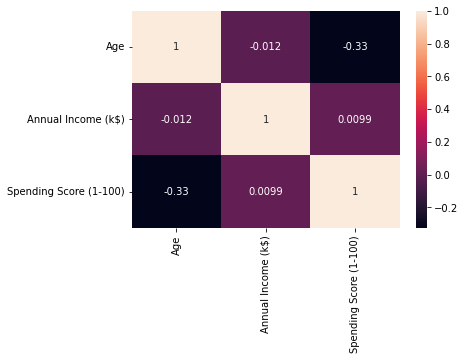

In [ ]:
sns.heatmap(df.corr(),annot=True)

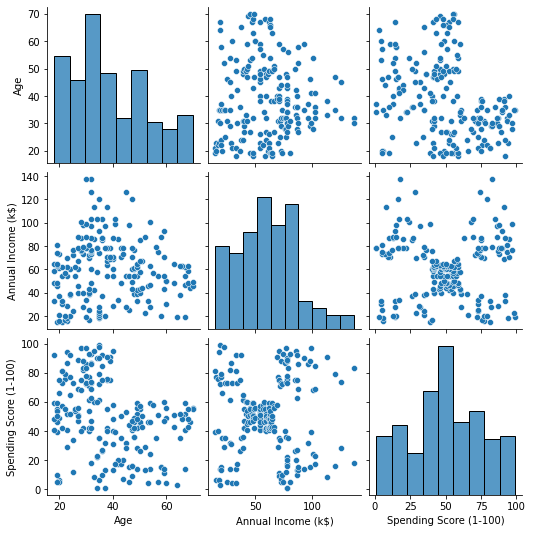

In [ ]:
#Mivariate Analysis
sns.pairplot(df)

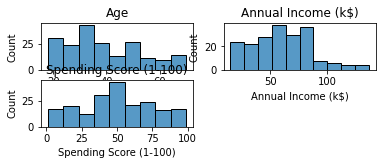

In [ ]:
#Univariate Analysis of Continous Variables
l=list(df.columns)
l1=l[1:]
for i in range(len(l1)):
  plt.subplot(4,2,i+1)
  sns.histplot(df[l1[i]])
  plt.title(f'{l1[i]}')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender')

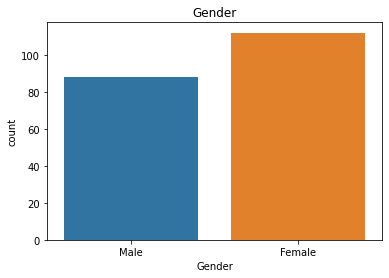

In [ ]:
#Univariate Analysis of Categorical Values
sns.countplot(df['Gender'])
plt.title('Gender')

In [ ]:
#Bivariate Analysis of Continous Variables
df[list(df.columns[2:])].corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


In [ ]:
#Label Encoding For Categorical Values
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [65]:
#Outiers Identification And Replacing Using Quantile-Based Flooring and Capping for Continuous Variables

q1=df['Age'].quantile(0.10)
q2=df['Age'].quantile(0.90)
df['Age']=np.where(df['Age']<q1,q1,df['Age'])
df['Age']=np.where(df['Age']>q2,q2,df['Age'])
print(df['Age'].skew())

q1=df['Annual Income (k$)'].quantile(0.10)
q2=df['Annual Income (k$)'].quantile(0.90)
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']<q1,q1,df['Annual Income (k$)'])
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>q2,q2,df['Annual Income (k$)'])
print(df['Annual Income (k$)'].skew())

q1=df['Spending Score (1-100)'].quantile(0.10)
q2=df['Spending Score (1-100)'].quantile(0.90)
df['Spending Score (1-100)']=np.where(df['Spending Score (1-100)']<q1,q1,df['Spending Score (1-100)'])
df['Spending Score (1-100)']=np.where(df['Spending Score (1-100)']>q2,q2,df['Spending Score (1-100)'])
print(df['Spending Score (1-100)'].skew())


0.2781169238301793
-0.11738632138184847
-0.03744215109217243


In [19]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,21.0,15,39
1,1,21.0,15,81
2,0,21.0,16,6
3,0,23.0,16,77
4,0,31.0,17,40
...,...,...,...,...
195,0,35.0,120,79
196,0,45.0,126,28
197,1,32.0,126,74
198,1,32.0,137,18


In [20]:
#Scaling Variables
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(df)
print(scaled)

[[ 1.12815215 -1.39135432 -1.73899919 -0.43480148]
 [ 1.12815215 -1.39135432 -1.73899919  1.19570407]
 [-0.88640526 -1.39135432 -1.70082976 -1.71591298]
 [-0.88640526 -1.23096766 -1.70082976  1.04041783]
 [-0.88640526 -0.58942104 -1.66266033 -0.39597992]
 [-0.88640526 -1.31116099 -1.66266033  1.00159627]
 [-0.88640526 -0.26864773 -1.62449091 -1.71591298]
 [-0.88640526 -1.23096766 -1.62449091  1.70038436]
 [ 1.12815215  1.65599294 -1.58632148 -1.83237767]
 [-0.88640526 -0.66961437 -1.58632148  0.84631002]
 [ 1.12815215  1.65599294 -1.58632148 -1.4053405 ]
 [-0.88640526 -0.26864773 -1.58632148  1.89449216]
 [-0.88640526  1.57579881 -1.54815205 -1.36651894]
 [-0.88640526 -1.15077434 -1.54815205  1.04041783]
 [ 1.12815215 -0.10826107 -1.54815205 -1.44416206]
 [ 1.12815215 -1.31116099 -1.54815205  1.11806095]
 [-0.88640526 -0.26864773 -1.50998262 -0.59008772]
 [ 1.12815215 -1.39135432 -1.50998262  0.61338066]
 [ 1.12815215  1.09463885 -1.43364376 -0.82301709]
 [-0.88640526 -0.26864773 -1.43

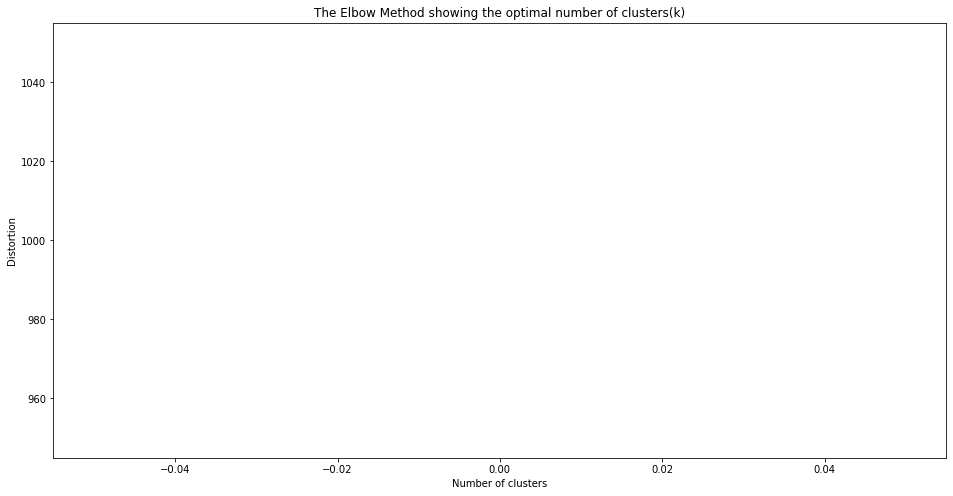

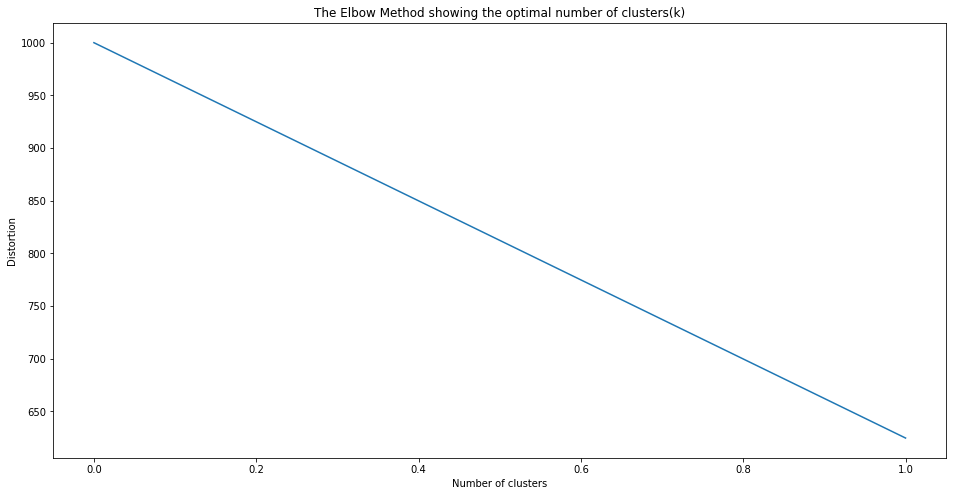

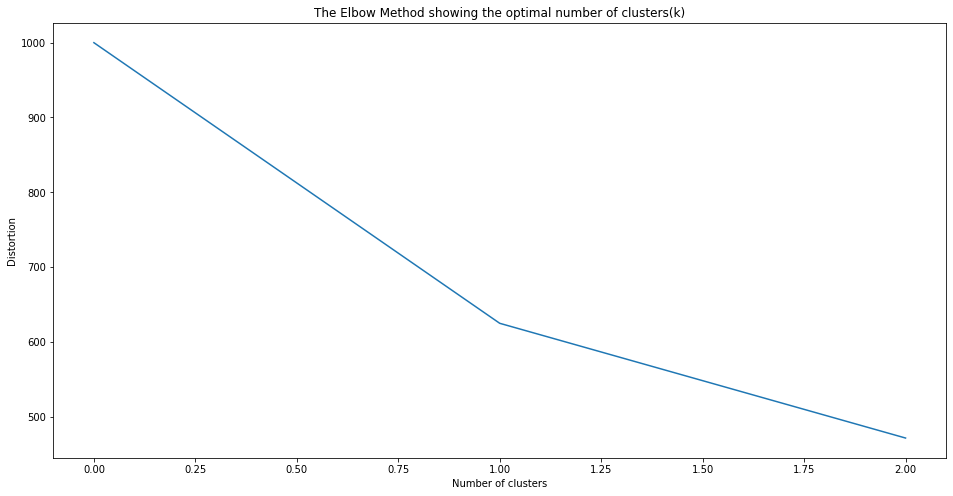

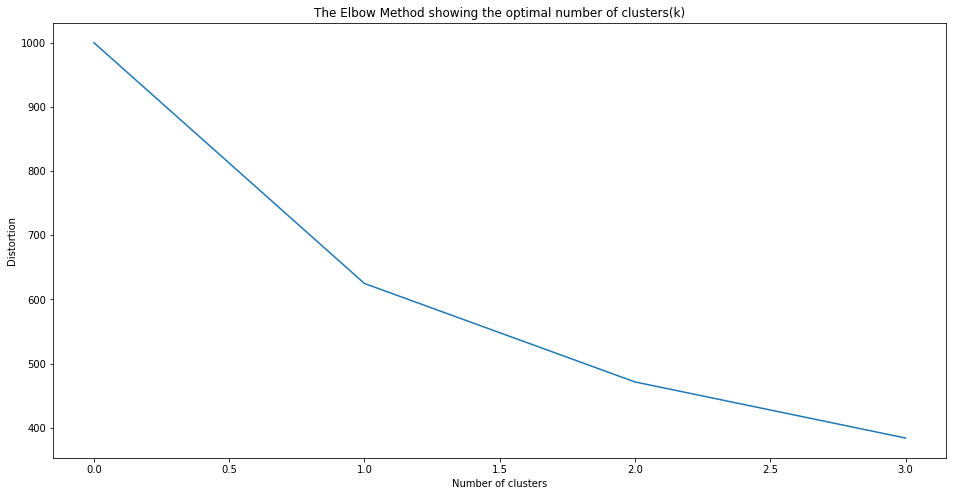

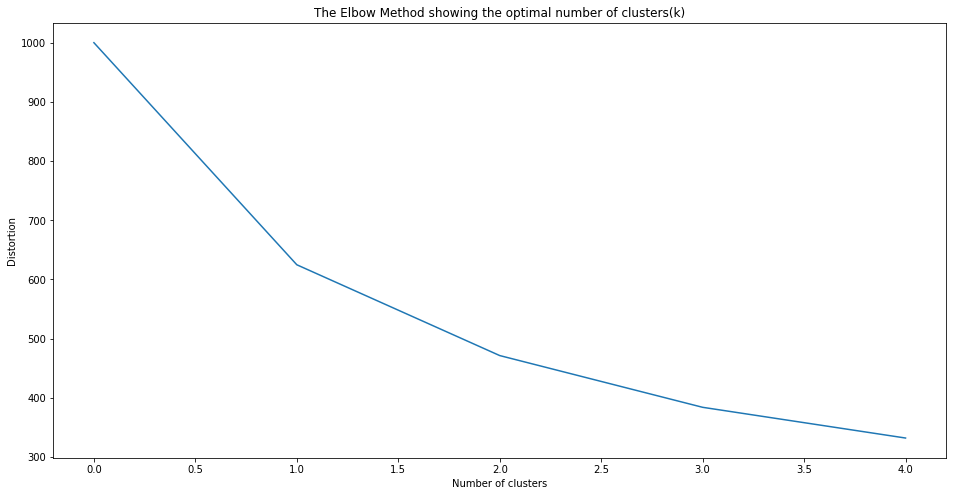

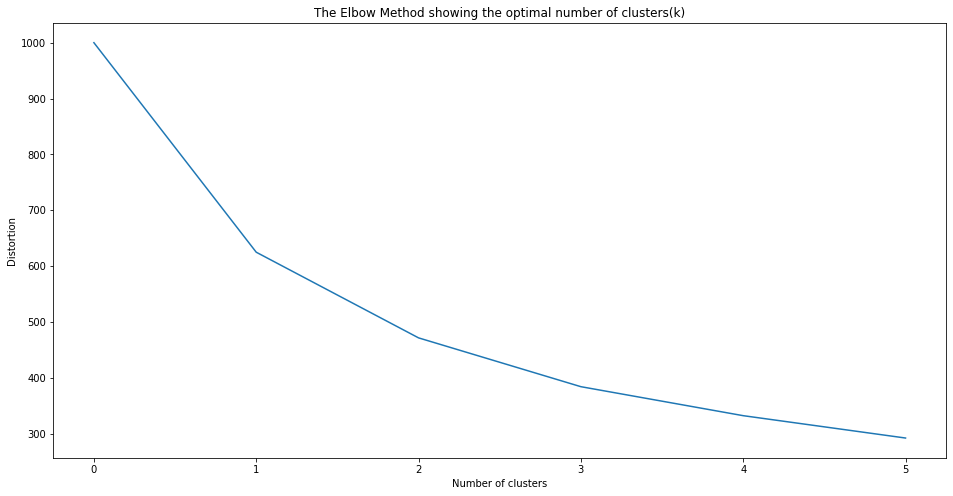

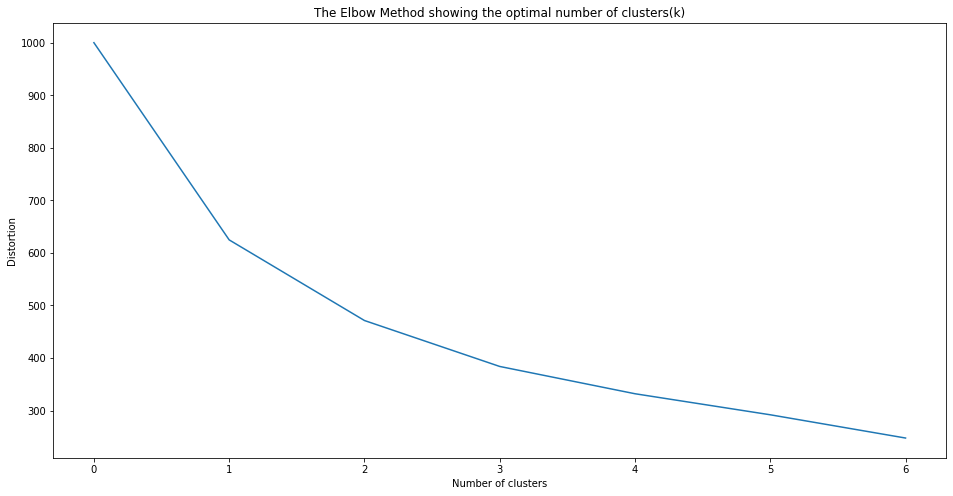

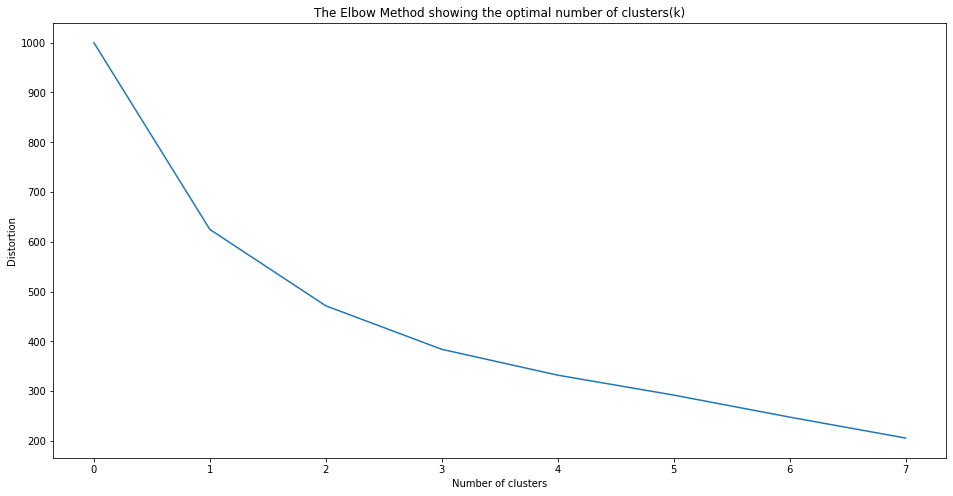

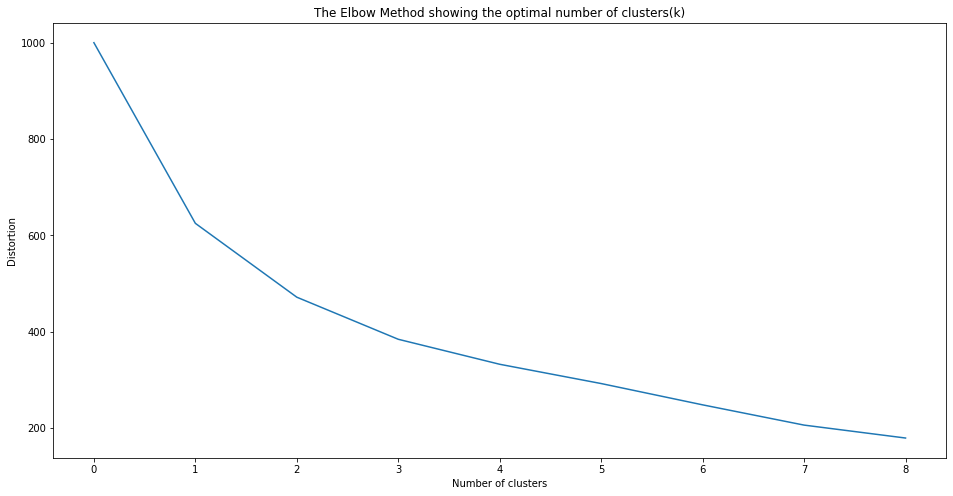

In [80]:
#Elbow Method To Find Number Of Clusters
w=[]
K=range(1,10)
for k in K:
  kmeanModel=KMeans(n_clusters=k)
  kmeanModel.fit(scaled)
  w.append(kmeanModel.inertia_)

  plt.figure(figsize=(16,8))
  plt.plot(w)
  plt.xlabel('Number of clusters')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal number of clusters(k)')

  plt.show()

In [71]:
#Training the model-support vectom regression
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=3)
kmean.fit(scaled)
y_pred=kmean.predict(scaled)
df['pred_cluster']=y_pred
df.head


<bound method NDFrame.head of      Gender   Age  Annual Income (k$)  Spending Score (1-100)  pred_cluster
0         1  21.0             23.9999                    39.0             0
1         1  21.0             23.9999                    81.0             0
2         0  21.0             23.9999                    13.0             2
3         0  23.0             23.9999                    77.0             0
4         0  31.0             23.9999                    40.0             2
..      ...   ...                 ...                     ...           ...
195       0  35.0             93.0004                    79.0             0
196       0  45.0             93.0004                    28.0             2
197       1  32.0             93.0004                    74.0             0
198       1  32.0             93.0004                    18.0             1
199       1  30.0             93.0004                    83.0             0

[200 rows x 5 columns]>

In [39]:
#Independent Variables
l2=list(df.columns)
df2=df[l2[:len(l2)-1]]
df2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,21.0,15,39
1,1,21.0,15,81
2,0,21.0,16,6
3,0,23.0,16,77
4,0,31.0,17,40


In [40]:
#Dependent Variables
df1=df['pred_cluster']
df1

0      0
1      0
2      2
3      0
4      2
      ..
195    0
196    2
197    0
198    1
199    0
Name: pred_cluster, Length: 200, dtype: int32

In [41]:
#Scaling Variables
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(df)
print(scaled)

[[ 1.12815215 -1.39135432 -1.73899919 -0.43480148 -1.02755996]
 [ 1.12815215 -1.39135432 -1.73899919  1.19570407 -1.02755996]
 [-0.88640526 -1.39135432 -1.70082976 -1.71591298  1.29460945]
 [-0.88640526 -1.23096766 -1.70082976  1.04041783 -1.02755996]
 [-0.88640526 -0.58942104 -1.66266033 -0.39597992  1.29460945]
 [-0.88640526 -1.31116099 -1.66266033  1.00159627 -1.02755996]
 [-0.88640526 -0.26864773 -1.62449091 -1.71591298  1.29460945]
 [-0.88640526 -1.23096766 -1.62449091  1.70038436 -1.02755996]
 [ 1.12815215  1.65599294 -1.58632148 -1.83237767  0.13352474]
 [-0.88640526 -0.66961437 -1.58632148  0.84631002 -1.02755996]
 [ 1.12815215  1.65599294 -1.58632148 -1.4053405   0.13352474]
 [-0.88640526 -0.26864773 -1.58632148  1.89449216 -1.02755996]
 [-0.88640526  1.57579881 -1.54815205 -1.36651894  1.29460945]
 [-0.88640526 -1.15077434 -1.54815205  1.04041783 -1.02755996]
 [ 1.12815215 -0.10826107 -1.54815205 -1.44416206  0.13352474]
 [ 1.12815215 -1.31116099 -1.54815205  1.11806095 -1.02

In [77]:
#Splitting Dataset
import numpy as np
from sklearn.model_selection import train_test_split
y=df['pred_cluster'].to_numpy()
X_train,X_test,y_train,y_test=train_test_split(scaled,y,test_size=0.10,random_state=42)


In [43]:
X_train.shape

(180, 5)

In [44]:
X_test.shape

(20, 5)

In [45]:
y_train.shape

(180,)

In [46]:
y_test.shape

(20,)

In [47]:
#Training the model
from sklearn.svm import SVR
regrassor=SVR(kernel='rbf')
regrassor.fit(X_train,y_train)

SVR()

In [48]:
#Testing the model
y_pred=regrassor.predict((X_test))

In [49]:
df3=pd.DataFrame({'Predicted value':y_pred,'Real Value':y_test})
df3

,Predicted value,Real Value
0,0.029054,0
1,0.046914,0
2,1.096636,1
3,1.034491,1
4,1.096825,1
5,0.025797,0
6,1.953523,2
7,1.072279,1
8,2.017243,2
9,-0.042076,0


In [50]:
#performance metrics
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred)))

0.0035353284304680778
0.059458627889214515
